# Atmospheric refraction
Variations in aerosols, temperature, and pressure of the atmosphere result in the sun's rays being refracted as they pass through the atmosphere. This phenomenon causes the angle of the sun observed at the surface of the Earth to be higher in the sky than the true (geometric) position. As a result, the sun is visible for a short time before sunrise and after sunset.

![Illustration of atmospheric refraction](figures/illustration_atmospheric_refraction.png)
*Figure 1: Illustration of atmospheric refraction. Notice how the apparent shape of the sun is an oval instead of a circle .*

Refraction is most pronounced when the sun is near the horizon (about half a degree), as the path through the atmosphere is the longest (higher airmass). While refraction depends on the state of the atmosphere along the entire path through the atmosphere, including atmospheric aerosols and temperature, a number of simple models have been developed to approximate refraction. The main input to these functions is the solar elevation angle. Some models are able to account for secondary order effects of annual average temperature and pressure.

## Comparison of refraction models

Several different refraction models have been proposed in the literature. The Python package `solposx` features six different [refraction models](refraction). To compare the different refraction models, the refraction angle is calculated in the range -5 to 90 degree solar elevation in steps of 0.1 degrees.

In [1]:
import numpy as np
import pandas as pd
import solposx

functions = {
    'Archer': solposx.refraction.archer,
    'Bennett': solposx.refraction.bennett,
    'Hughes': solposx.refraction.hughes,
    'Michalsky': solposx.refraction.michalsky,
    'SG2': solposx.refraction.sg2,
    'SPA': solposx.refraction.spa,
}

elevation = np.arange(-5, 90, 0.1)

refraction = pd.DataFrame(
    data={name: function(elevation) for name, function in functions.items()},
    index=elevation)

C:\Users\iosif\AppData\Local\anaconda3\envs\solposx\Lib\site-packages\pvlib\tools.py:100: RuntimeWarning: invalid value encountered in arccos
  res = np.degrees(np.arccos(number))


A comparison of the refraction models is visualized below. The plot on the left shows refraction for solar elevation angles near sunrise/sunset, where refraction is most significant. The plot on the right shows the refraction angles for the entire range of solar elevation angles. Note that for the right plot, the y-axis is a log scale, which emphasises the difference between the models.

For each of the plots below, it is possible to expand the code block above to see how the `solposx` package was used to calculate the outputs.

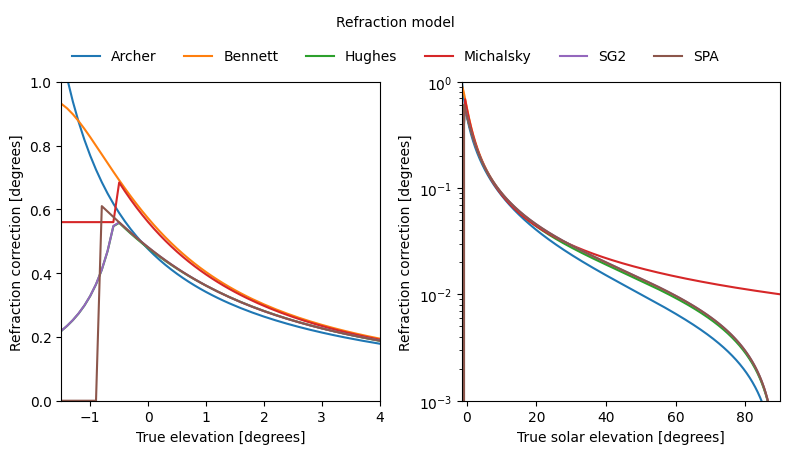

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

refraction.plot(ax=axes[0])
axes[0].set_ylim(0, 1.0)
axes[0].set_xlim(-1.5, 4)
axes[0].set_ylabel('Refraction correction [degrees]')
axes[0].set_xlabel('True elevation [degrees]')

refraction.plot(ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_ylim(1e-3, 1.0)
axes[1].set_xlim(-1.5, 90)
axes[1].set_ylabel('Refraction correction [degrees]')
axes[1].set_xlabel('True solar elevation [degrees]')

fig.tight_layout()

axes[0].legend(loc='upper center', bbox_to_anchor=[1.05, 1.25], title='Refraction model', labelspacing=1.5, ncol=6, frameon=False)
axes[1].legend([], frameon=False)
plt.show()

## Influence of atmospheric conditions

Some refraction models are able to account for the influence of temperature and pressure, which affects density and thus atmospheric refraction. Existing algorithms were derived based on annual averages, and thus, time series should not be provided.

Looking at the plots below, where the SPA refraction is used, it is evident that a higher annual average temperature decreases refraction. On the contrary, a higher annual average pressure increases refraction.

Generally, we believe that it is sufficient to use the default values (12 °C and 101325 Pa) for most applications.

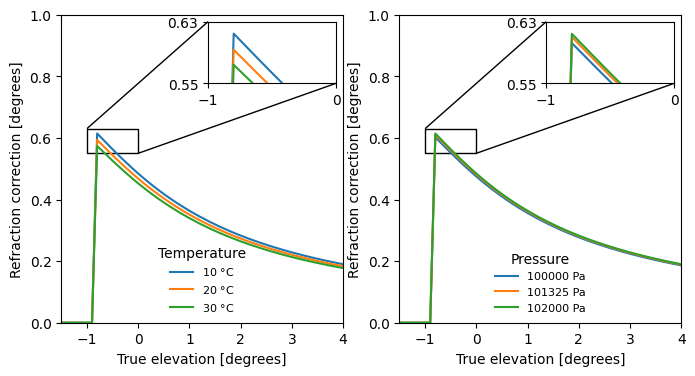

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

refraction_temperature = pd.DataFrame({
    rf"{temp} $\degree$C": solposx.refraction.spa(elevation, temperature=temp) for temp in [10, 20, 30]
}, index=elevation)

refraction_pressure = pd.DataFrame({
    rf"{pressure} Pa": solposx.refraction.spa(elevation, pressure=pressure) for pressure in [100000, 101325, 102000]
}, index=elevation)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axinsets = [zoomed_inset_axes(ax, zoom=2.5, loc="upper right") for ax in axes]

refraction_temperature.plot(ax=axes[0])
refraction_temperature.plot(ax=axinsets[0])
refraction_pressure.plot(ax=axes[1])
refraction_pressure.plot(ax=axinsets[1])

for ax, axins in zip(axes, axinsets):
    ax.set_ylim(0, 1)
    ax.set_xlim(-1.5, 4)
    ax.set_ylabel('Refraction correction [degrees]')
    ax.set_xlabel('True elevation [degrees]')

    axins.set_ylim(0.55, 0.63)
    axins.set_xlim(-1, 0)
    axins.get_legend().remove()
    axins.set_xticks([-1, 0])
    axins.set_yticks([0.55, 0.63])

    mark_inset(ax, axins, loc1=2, loc2=4)    

axes[0].legend(title=r'Temperature', frameon=False, loc="lower center", fontsize=8)
axes[1].legend(title='Pressure', frameon=False, loc="lower center", fontsize=8)

plt.show()